**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [68]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import math

pd.options.mode.chained_assignment = None 
%matplotlib inline
%pylab inline

PUIdata /nfshome/mv1742/PUIDATA
Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [69]:
s = json.load( open(os.getenv('PUIDATA')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:800: MatplotlibDeprecationWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  mplDeprecation)


In [70]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''

    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars use the functions created above

In [71]:
np.random.rand()
Y=np.zeros(10)
x = np.linspace(10,100,num=10)
slope = 0.90
counter = 0
#Y=line(slope,x)+np.random.rand()*100
for i in x:
    #print(i+10)
    Y[counter]=line(slope,i+10)+np.random.rand()*20
    counter+=1
    #print(counter)
print(Y)

[  28.37972759   37.67396506   55.90538883   61.5864336    67.47155021
   74.00898209   73.17704002   92.48035857   97.59838854  111.86204336]


In [72]:
x

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

In [73]:
Y

array([  28.37972759,   37.67396506,   55.90538883,   61.5864336 ,
         67.47155021,   74.00898209,   73.17704002,   92.48035857,
         97.59838854,  111.86204336])

Figure XX: Plotting endogenous random points from exogenous random points


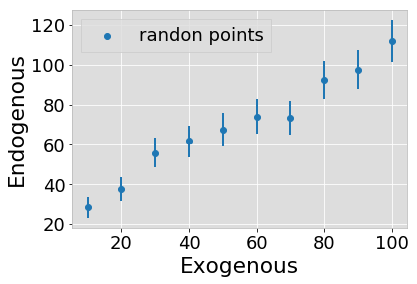

In [74]:

pl.scatter(x,Y, label = "randon points")
pl.errorbar(x, Y, yerr=errors(Y), fmt='.')
pl.xlabel("Exogenous")
pl.ylabel("Endogenous")
pl.legend();
print("Figure XX: Plotting endogenous random points from exogenous random points")

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [75]:
print('y:',Y)

y: [  28.37972759   37.67396506   55.90538883   61.5864336    67.47155021
   74.00898209   73.17704002   92.48035857   97.59838854  111.86204336]


In [76]:
print('x:',x)
X_addconstantresult = sm.add_constant(x)
print('x array with constant b_i ([b, x]) \n',X_addconstantresult)

x: [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
x array with constant b_i ([b, x]) 
 [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


In [77]:
X_addconstantresult = sm.add_constant(x)
print('x array with constant b_i ([b, x]) \n',X_addconstantresult)

x array with constant b_i ([b, x]) 
 [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [78]:
lm = smf.OLS(Y, X_addconstantresult).fit()
lm.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     233.9
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           3.31e-07
Time:                        22:50:18   Log-Likelihood:                -29.210
No. Observations:                  10   AIC:                             62.42
Df Residuals:                       8   BIC:                             63.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         23.5145      3.430      6.856      0.000        15.605    31.424
x1             0.8455      0.055     15.294      0.000         0.718     0.973
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.429
Skew:                          -0.499   Prob(JB):                        0.807
Kurtosis:                       2.812   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
predicted = lm.predict()

In [80]:
#BECAUSSE AN INTERCEPT BETTER FITS THE DATA
#THE WRONG WAY WOULD BE HAVING NO INTERCEPT?
smfit = smf.OLS(Y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     348.8
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.66e-08
Time:                        22:50:18   Log-Likelihood:                -38.849
No. Observations:                  10   AIC:                             79.70
Df Residuals:                       9   BIC:                             80.00
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.1814      0.063     18.676      0.000         1.038     1.324
==============================================================================
Omnibus:                        3.118   Durbin-Watson:                   0.299
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                0.986
Skew:                          -0.060   Prob(JB):                        0.611
Kurtosis:                       1.467   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
wrongpredicted=smfit.predict()

# 4. plot the data (as points) and both statsmodels fits

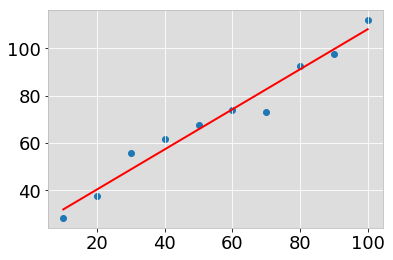

Figure XX: Predicted linear model with intercept


In [82]:
plt.scatter(x,Y)
plt.plot(x,predicted,'r-')
plt.show()
print("Figure XX: Predicted linear model with intercept")

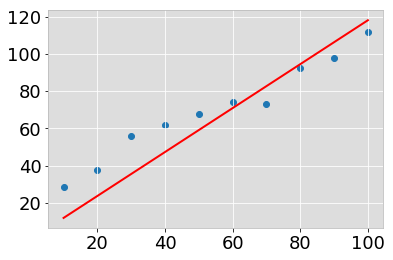

Figure XX: Predicted linear model without intercept


In [83]:
plt.scatter(x,Y)
plt.plot(x,wrongpredicted,'r-')
plt.show()
print("Figure XX: Predicted linear model without intercept")

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [84]:
np.random.rand()
Y2=np.zeros(10)
x2 = np.linspace(10,100,num=10)
slope = 0.90
counter = 0
intercept = slope*150
print(intercept)
#Y2=line(slope,x2,b=intercept)
for i in x:
    #print(i+10)
    Y2[counter]=line(slope,i+10, b=intercept)+np.random.rand()*20
    counter+=1
#print(counter)
print(Y2)

135.0
[ 155.08435614  181.84099858  189.15774742  189.5181167   199.2262355
  202.18669466  218.87448643  225.4913972   237.51160822  237.80604452]


Figure XX: Random points with chosen slope and intercept


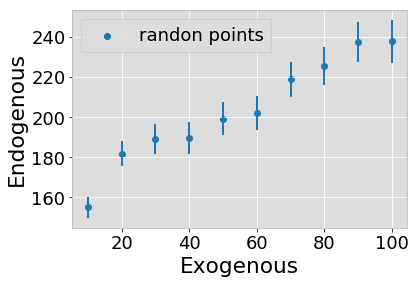

In [85]:
pl.scatter(x2,Y2, label = "randon points")
pl.errorbar(x2, Y2, yerr=errors(Y), fmt='.')
pl.xlabel("Exogenous")
pl.ylabel("Endogenous")
pl.legend()
print("Figure XX: Random points with chosen slope and intercept")

# 6. repeat step 3

In [86]:
#RIGHT 
print('y:',Y2)
print('x:',x2)
X2_addconstantresult = sm.add_constant(x2)
print('x2 array with constant b_i ([b, x]) \n',X2_addconstantresult)
lm2 = smf.OLS(Y2, X2_addconstantresult).fit()
lm2.summary()
predicted2 = lm2.predict()
#WRONG
smfit2 = smf.OLS(Y2, x2).fit()
smfit2.summary()
wrongpredicted2=smfit2.predict()


y: [ 155.08435614  181.84099858  189.15774742  189.5181167   199.2262355
  202.18669466  218.87448643  225.4913972   237.51160822  237.80604452]
x: [  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]
x2 array with constant b_i ([b, x]) 
 [[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


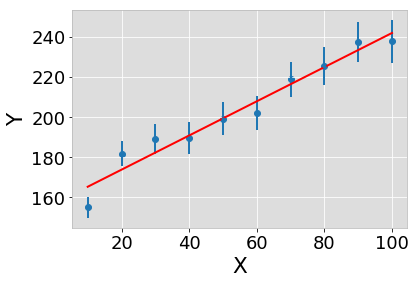

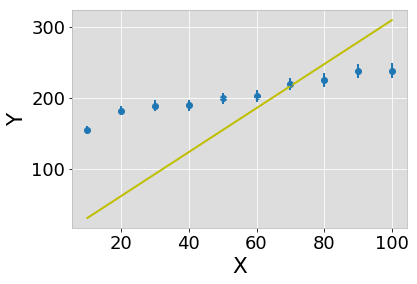

Figure XX.1: Fitted OLS line on random points with chosen slope and intercept (top)
Figure XX.2: Fitted OLS line on random points with chosen slope without a dummy intercept for the regression (bottom)


In [102]:
plt.scatter(x2,Y2)
plt.plot(x2,predicted2,'r-')
plt.errorbar(x2, Y2, yerr=errors(Y), fmt='.')
pl.xlabel("X")
pl.ylabel("Y")
plt.show()
plt.scatter(x2,Y2)
plt.plot(x2,wrongpredicted2,'y-')
plt.errorbar(x2, Y2, yerr=errors(Y), fmt='.')
pl.xlabel("X")
pl.ylabel("Y")
plt.show()
print("Figure XX.1: Fitted OLS line on random points with chosen slope and intercept (top)")
print("Figure XX.2: Fitted OLS line on random points with chosen slope without a dummy intercept for the regression (bottom)")

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [88]:
#create weights

In [89]:
a =errors(Y2)
a

array([ 12.45328696,  13.48484329,  13.75346311,  13.76655791,
        14.11475241,  14.21923678,  14.79440727,  15.01637097,
        15.41141162,  15.42096121])

In [90]:
Y2.size

10

In [91]:
#from numpy.linalg import inv
inverse = 1/a
inverse

array([ 0.08030008,  0.07415733,  0.07270896,  0.0726398 ,  0.07084786,
        0.07032726,  0.06759311,  0.06659399,  0.06488698,  0.0648468 ])

In [92]:
nsample = Y2.size

#RIGHT 
#WLS knowing the true variance ratio of heteroscedasticity
mod_wls = sm.WLS(Y2, X2_addconstantresult, weights=inverse)
res_wls = mod_wls.fit()
res_wls.summary
wlspredicted2 = res_wls.predict()
#WRONG
wrong_mod_wls = sm.WLS(Y2, x2, weights=inverse)
wrong_res_wls = mod_wls.fit()
wrong_res_wls.summary
wrong_wlspredicted2 = res_wls.predict()


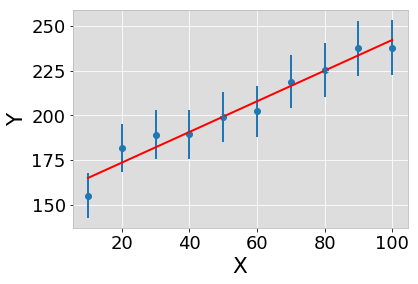

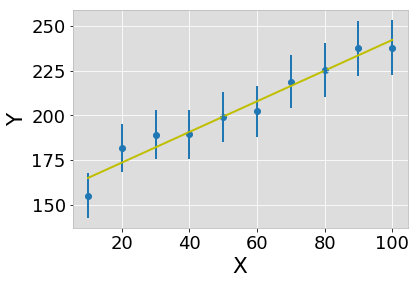

Figure XX.1: Fitted WLS line on random points with chosen slope and intercept (top)
Figure XX.2: Fitted WLS line on random points with chosen slope without a dummy intercept for the regression (bottom)
Note: WLS doesn't require add dummy constant???


In [103]:
plt.scatter(x2,Y2)
plt.plot(x2,wlspredicted2,'r-')
pl.errorbar(x2, Y2, yerr=a, fmt='.')
pl.xlabel("X")
pl.ylabel("Y")
plt.show()
plt.scatter(x2,Y2)
plt.plot(x2,wrong_wlspredicted2,'y-')
pl.errorbar(x2, Y2, yerr=a, fmt='.')
pl.xlabel("X")
pl.ylabel("Y")
plt.show()
print("Figure XX.1: Fitted WLS line on random points with chosen slope and intercept (top)")
print("Figure XX.2: Fitted WLS line on random points with chosen slope without a dummy intercept for the regression (bottom)")
print("Note: WLS doesn't require add dummy constant???")

In [94]:
res_wls.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.952
Model:                            WLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     159.6
Date:                Sat, 17 Nov 2018   Prob (F-statistic):           1.45e-06
Time:                        22:50:19   Log-Likelihood:                -31.301
No. Observations:                  10   AIC:                             66.60
Df Residuals:                       8   BIC:                             67.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        156.3918      4.110     38.054      0.000       146.915   165.869
x1             0.8581      0.068     12.635      0.000         0.701     1.015
==============================================================================
Omnibus:                        0.210   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.291
Skew:                          -0.256   Prob(JB):                        0.864
Kurtosis:                       2.339   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

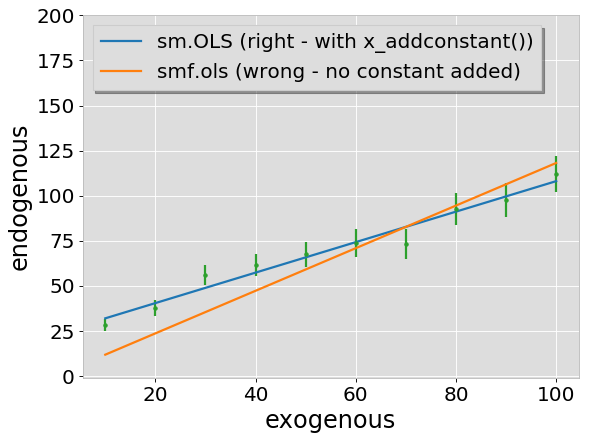

In [98]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
pl.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
smfmodel = smf.ols('Y ~ x + const', data={'x':x, 'y':Y, 'const':np.ones(len(x))}).fit()
ax1 = pl.plot(x, lm.fittedvalues, '-')
ax2 = pl.plot(x, smfit.fittedvalues, '-')
pl.errorbar(x, Y, yerr=errors(x), fmt='.')

plt.ylim([-1, 200])
pl.legend(("sm.OLS (right - with x_addconstant())", "smf.ols (wrong - no constant added)"),
           loc='upper left', shadow=True)
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();

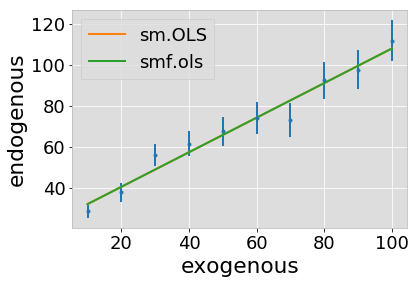

In [99]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('Y ~ x + const', data={'x':x, 'y':Y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, Y, yerr=errors(x), fmt='.')
pl.plot(x, lm.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();